In [ ]:
import torchvision
import numpy as np
import pandas as pd
import os
import random
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 83.7MB/s]


In [ ]:
train = pd.read_csv(r"/content/drive/MyDrive/acfr-fruit-dataset/training_annotations.csv")
train.drop(train.columns[train.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
train["dx"] = train["x"] + train["dx"]
train["dy"] = train["y"] + train["dy"]
train["x"] = train["x"]
for i in range(len(train["x"])):
  train["x"][i] = int(train["x"][i])
for i in range(len(train["y"])):
  train["y"][i] = int(train["y"][i])
for i in range(len(train["dx"])):
  train["dx"][i] = int(train["dx"][i])
for i in range(len(train["dy"])):
  train["dy"][i] = int(train["dy"][i])
train.rename(columns = {'x':'x1','dx':'x2','y':'y1','dy':'y2', 'id': 'image_id'}, inplace = True)
train = train.reindex(columns=['image_id',"x1","y1","x2","y2"])
train.head()

<ipython-input-5-54890f42a0ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["x"][i] = int(train["x"][i])
<ipython-input-5-54890f42a0ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["y"][i] = int(train["y"][i])
<ipython-input-5-54890f42a0ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["dx"][i] = int(train["dx"][i])
<ipython-input-5-54890f42a0ad>:13: SettingWithCopyWarning: 
A value is trying to be set on 

,image_id,x1,y1,x2,y2
0,20151124T025055.334119_i2024j1313,275.0,53.0,311.0,92.0
1,20151124T043652.721593_i1808j362,341.0,287.0,397.0,345.0
2,20151124T043652.721593_i1808j362,438.0,309.0,494.0,380.0
3,20151124T043652.721593_i1808j362,421.0,373.0,472.0,437.0
4,20151124T043652.721593_i1808j362,452.0,442.0,496.0,498.0


In [ ]:
train_almonds = pd.read_csv(r"/content/drive/MyDrive/acfr-fruit-dataset/training_annotations.csv")
train_almonds.drop(train_almonds.columns[train_almonds.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
train_almonds["dx"] = train_almonds["x"] + train_almonds["dx"]
train_almonds["dy"] = train_almonds["y"] + train_almonds["dy"]
train_almonds["x"] = train_almonds["x"]
for i in range(len(train_almonds["x"])):
  train_almonds["x"][i] = int(train_almonds["x"][i])
for i in range(len(train_almonds["y"])):
  train_almonds["y"][i] = int(train_almonds["y"][i])
for i in range(len(train_almonds["dx"])):
  train_almonds["dx"][i] = int(train_almonds["dx"][i])
for i in range(len(train_almonds["dy"])):
  train_almonds["dy"][i] = int(train_almonds["dy"][i])
train_almonds.rename(columns = {'x':'x1','dx':'x2','y':'y1','dy':'y2', 'id': 'image_id'}, inplace = True)
train_almonds = train_almonds.reindex(columns=['image_id',"x1","y1","x2","y2"])
train_almonds.head()

<ipython-input-6-b6b6fa7218a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_almonds["x"][i] = int(train_almonds["x"][i])
<ipython-input-6-b6b6fa7218a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_almonds["y"][i] = int(train_almonds["y"][i])
<ipython-input-6-b6b6fa7218a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_almonds["dx"][i] = int(train_almonds["dx"][i])
<ipython-input-6-b6b6fa7218a0>:13: SettingW

,image_id,x1,y1,x2,y2
0,20151124T025055.334119_i2024j1313,275.0,53.0,311.0,92.0
1,20151124T043652.721593_i1808j362,341.0,287.0,397.0,345.0
2,20151124T043652.721593_i1808j362,438.0,309.0,494.0,380.0
3,20151124T043652.721593_i1808j362,421.0,373.0,472.0,437.0
4,20151124T043652.721593_i1808j362,452.0,442.0,496.0,498.0


In [ ]:
unique_imgs = train.image_id.unique()
unique_imgs_almonds = train_almonds.image_id.unique()


In [ ]:
class CustDat(torch.utils.data.Dataset):
  def __init__(self, df, unique_imgs, indices):
    self.df = df
    self.unique_imgs = unique_imgs
    self.indices = indices
  def __len__(self):
    return len(self.indices)
  def __getitem__(self, idx):
    image_name = self.unique_imgs[self.indices[idx]]
    boxes = self.df[self.df.image_id == image_name].values[:, 1:].astype("float")
    img = Image.open("/content/drive/MyDrive/acfr-fruit-dataset/mangoes/images/" + image_name + ".png").convert("RGB")
    labels = torch.ones((boxes.shape[0]), dtype = torch.int64)
    target = {}
    target["boxes"] = torch.tensor(boxes)
    target["label"] = labels
    return T.ToTensor()(img), target

In [ ]:
class CustDatAlmonds(torch.utils.data.Dataset):
  def __init__(self, df, unique_imgs_almonds, indices):
    self.df = df
    self.unique_imgs_almonds = unique_imgs_almonds
    self.indices = indices
  def __len__(self):
    return len(self.indices)
  def __getitem__(self, idx):
    image_name = self.unique_imgs_almonds[self.indices[idx]]
    boxes = self.df[self.df.image_id == image_name].values[:, 1:].astype("float")
    img = Image.open("/content/drive/MyDrive/acfr-fruit-dataset/almonds/images/" + image_name + ".png").convert("RGB")
    labels = torch.full((boxes.shape[0]), fill_value= 2,dtype = torch.int64)
    target = {}
    target["boxes"] = torch.tensor(boxes)
    target["label"] = labels
    return T.ToTensor()(img), target

In [ ]:
train_inds, val_inds = train_test_split(range(unique_imgs.shape[0]), test_size = 0.1)
train_inds_almonds, val_inds_almonds = train_test_split(range(unique_imgs_almonds.shape[0]), test_size = 0.1)

In [ ]:
def custom_collate(data):
  return data

In [ ]:
train_dl = torch.utils.data.DataLoader(CustDat(train, unique_imgs, train_inds),
                                       batch_size = 4,
                                       shuffle = True,
                                       collate_fn = custom_collate,
                                       pin_memory = True if torch.cuda.is_available() else False)

val_dl = torch.utils.data.DataLoader(CustDat(train, unique_imgs, val_inds),
                                       batch_size = 8,
                                       shuffle = True,
                                       collate_fn = custom_collate,
                                       pin_memory = True if torch.cuda.is_available() else False)

In [ ]:
almonds_dl = torch.utils.data.DataLoader(CustDatAlmonds(train_almonds, unique_imgs_almonds, train_inds_almonds),
                                       batch_size = 4,
                                       shuffle = True,
                                       collate_fn = custom_collate,
                                       pin_memory = True if torch.cuda.is_available() else False)
val_almonds_dl = torch.utils.data.DataLoader(CustDatAlmonds(train_almonds, unique_imgs_almonds, val_inds_almonds),
                                       batch_size = 8,
                                       shuffle = True,
                                       collate_fn = custom_collate,
                                       pin_memory = True if torch.cuda.is_available() else False)

In [ ]:
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum= 0.9, weight_decay=0.0005)
num_epochs = 50


In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
checkpoint = torch.load("/content/drive/MyDrive/acfr-fruit-dataset/checkpoint(3).pth")
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
model.train()
model.to(device)
for epochs in range(num_epochs):
  epoch_loss = 0
  for data in almonds_dl:
    imgs = []
    targets = []
    for d in data:
      imgs.append(d[0].to(device))
      targ = {}
      targ["boxes"] = d[1]["boxes"].to(device)
      targ["labels"] = d[1]["label"].to(device)
      targets.append(targ)
    loss_dict = model(imgs, targets)
    loss = sum(v for v in loss_dict.values())
    epoch_loss += loss.cpu().detach().numpy()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch", epochs, " loss: ", epoch_loss)


Epoch 0  loss:  52.133788430814626


In [ ]:
model.eval()
data = iter(val_dl).__next__()
target = data[0]
target
# data2 = iter(almonds_dl).__next__()

[tensor([[[0.1725, 0.2039, 0.1451,  ..., 0.0902, 0.0863, 0.0824],
          [0.1843, 0.2235, 0.1647,  ..., 0.0863, 0.0863, 0.0863],
          [0.2000, 0.2392, 0.1804,  ..., 0.0824, 0.0863, 0.0902],
          ...,
          [0.1059, 0.1020, 0.1059,  ..., 0.1333, 0.1255, 0.1176],
          [0.1098, 0.1059, 0.1098,  ..., 0.1412, 0.1294, 0.1216],
          [0.1137, 0.1137, 0.1137,  ..., 0.1176, 0.1216, 0.1216]],
 
         [[0.2078, 0.1804, 0.1529,  ..., 0.0745, 0.0667, 0.0745],
          [0.1882, 0.1882, 0.1490,  ..., 0.0745, 0.0667, 0.0667],
          [0.2078, 0.1961, 0.1765,  ..., 0.0667, 0.0627, 0.0667],
          ...,
          [0.0863, 0.0863, 0.0824,  ..., 0.0941, 0.0941, 0.0941],
          [0.0863, 0.0902, 0.0824,  ..., 0.0980, 0.1020, 0.1020],
          [0.0902, 0.0980, 0.0824,  ..., 0.0980, 0.0980, 0.0980]],
 
         [[0.2392, 0.1922, 0.1451,  ..., 0.0510, 0.0549, 0.0588],
          [0.2471, 0.2196, 0.1922,  ..., 0.0471, 0.0549, 0.0549],
          [0.2471, 0.2314, 0.2157,  ...,

In [ ]:
img = data[0][0]
boxes = data[0][1]["boxes"]
labels = data[0][1]["label"]
# img2 = data2[0][0]
# boxes2 = data2[0][1]["boxes"]
# labels2 = data2[0][1]["label"]

In [ ]:
model = model.to(device)
output = model([img.to(device)])
# output2 = model([img2.to(device)])
output


[{'boxes': tensor([[257.1026, 308.2458, 284.3354, 340.9796],
          [101.8212, 346.4412, 124.2971, 378.2223],
          [344.6442, 474.0846, 368.8656, 499.6647],
          [439.1510, 366.9635, 465.2661, 396.7529],
          [137.5163, 388.6521, 156.3560, 413.8451],
          [223.3795, 447.5272, 243.1905, 472.7400],
          [264.0092, 280.4656, 292.4749, 312.6744],
          [261.5733, 245.2757, 286.4005, 273.6634],
          [447.2137,  34.2328, 469.3112,  64.5303],
          [285.6724, 391.5590, 307.8792, 414.9861],
          [462.5471,  20.7510, 483.1723,  41.1989],
          [242.6742, 108.0754, 267.8633, 139.0261],
          [261.3128, 289.0607, 290.0165, 322.0486]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9996, 0.9996, 0.9994, 0.9990, 0.9990, 0.9973, 0.9973, 0.9960, 0.9952,
          0.9944, 0.9939, 0.9850, 0.1151], device='cuda:0',
         grad_fn=<IndexBackward

In [ ]:
# output2

In [ ]:
out_bbox = output[0]["boxes"]
out_scores = output[0]["scores"]
# out_bbox2 = output2[0]["boxes"]
# out_scores2 = output2[0]["scores"]

In [ ]:
keep = torchvision.ops.nms(out_bbox, out_scores, 0.45)
# keep2 = torchvision.ops.nms(out_bbox2, out_scores2, 0.45)

In [ ]:
out_bbox.shape, keep.shape

(torch.Size([13, 4]), torch.Size([12]))

In [ ]:
im = (img.permute(1, 2, 0).cpu().detach().numpy() * 255).astype("uint8")
# im2 = (img2.permute(1, 2, 0).cpu().detach().numpy() * 255).astype("uint8")

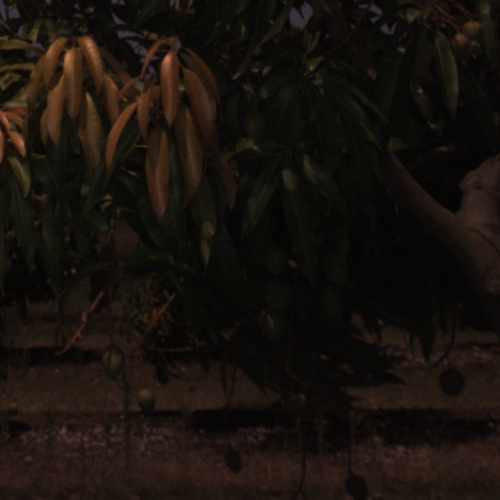

In [ ]:
vsample = Image.fromarray(im)

# vsample2 = Image.fromarray(im2)
vsample

In [ ]:
# vsample2

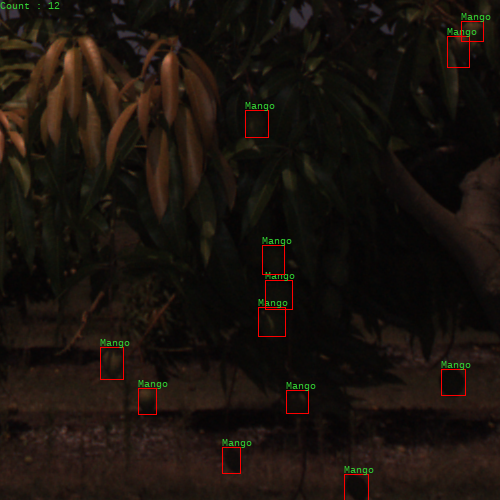

In [ ]:
draw = ImageDraw.Draw(vsample)
font = ImageFont.truetype(r'/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 10)
count = 0
for box in boxes:
  draw.rectangle(list(box), fill = None, outline = "red")
  draw.text((box[0], box[1] - 10), "Mango", font= font, fill=(50,205,50))
  count += 1
countstring = "Count : " + str(count)
draw.text((0,0), countstring, font= font, fill=(50,205,50))
vsample


In [ ]:
# draw2 = ImageDraw.Draw(vsample2)
# count2 = 0
# font = ImageFont.truetype(r'/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 10)
# font2 = ImageFont.truetype(r'/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 20)
# for box2 in boxes2:
#   draw2.rectangle(list(box2), fill = None, outline = "red")
#   draw2.text((box2[0], box2[1] - 10), "Almond", font= font, fill=(218,112,214))
#   count2 += 1
# count2string = "Count : " + str(count2)
# draw2.text((150,0), count2string, font= font2, fill=(218,112,214))
# vsample2

In [ ]:
# from google.colab import files
# torch.save({'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict(),}, 'checkpoint_mango.pth')

# # download checkpoint file
# files.download('checkpoint.pth')